<h1><center><font size="6">Final Modeling Notebook</font></center></h1>



# <a id='0'>Contents</a>

- <a href='#1'>Importing Packages</a>
- <a href='#2'>Base Model</a>  
    - <a href='#21'>Logistic Regression</a>
    - <a href='#22'>Random Forest Classifier</a>
    - <a href='#23'>Decision Tree Classifier</a>
    - <a href='#24'>K-Nearest Neighbors</a>
    - <a href='#25'>Gaussian Naive Bayes Classifier</a>
    - <a href='#26'>Linear Discriminant Analysis</a>
    - <a href='#27'>AdaBoost Classifier</a>
    - <a href='#28'>Gradient Boosting Classifier</a>
    - <a href='#29'>XGBoost Classifier</a>
- <a href='#3'>Model with Engineered Features</a>
    - <a href='#31'>Logistic Regression</a>
    - <a href='#32'>Random Forest Classifier</a>
    - <a href='#33'>Decision Tree Classifier</a>
    - <a href='#34'>K-Nearest Neighbors</a>
    - <a href='#35'>Gaussian Naive Bayes Classifier</a>
    - <a href='#36'>Linear Discriminant Analysis</a>
    - <a href='#37'>AdaBoost Classifier</a>
    - <a href='#38'>Gradient Boosting Classifier</a>
    - <a href='#39'>XGBoost Classifier</a>
- <a href='#4'>Feature Selection</a>
    - <a href='#41'>Decision Tree Feature Importance</a>
    - <a href='#42'>Random Forest Feature Importance</a>
    - <a href='#43'>XGBoost Feature Importance</a>
    - <a href='#44'>Recursive Feature Elimination with Cross-Validation</a>
- <a href='#5'>Discussion of Evaluation Metrics</a>


# Importing Packages

In [26]:
import numpy as np 
import pandas as pd
import re
from matplotlib import pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import itertools
from collections import Counter


from sklearn import linear_model
from sklearn.linear_model import LogisticRegression, SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, BaggingClassifier, HistGradientBoostingClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, cross_val_predict, GridSearchCV
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score, precision_recall_curve, roc_curve, roc_auc_score, classification_report, plot_confusion_matrix, auc, mean_squared_error, confusion_matrix, balanced_accuracy_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer, make_column_selector as selector
from imblearn.under_sampling import CondensedNearestNeighbour
from imblearn.ensemble import BalancedBaggingClassifier, BalancedRandomForestClassifier, EasyEnsembleClassifier, RUSBoostClassifier
from imblearn.metrics import geometric_mean_score
from imblearn.under_sampling import TomekLinks

import xgboost as xgb
from xgboost.sklearn import XGBClassifier


%reload_ext autoreload
%autoreload 2

from utils import *

plt.style.use("fivethirtyeight")
sns.set_theme(style="darkgrid", font='serif', context='poster')

import pickle

from imblearn.under_sampling import NeighbourhoodCleaningRule
from matplotlib import pyplot
from numpy import where
from imblearn.under_sampling import NearMiss 
from imblearn.under_sampling import OneSidedSelection
from numpy import mean
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import SMOTE
from sklearn.dummy import DummyClassifier
from sklearn.utils import resample
from sklearn.model_selection import cross_validate

# Importing and Preparing for Modeling

In [3]:
pickle_in = open("../pickle/training_model.pickle","rb")
train = pickle.load(pickle_in)
pickle_in = open("../pickle/validate_model.pickle","rb")
validate = pickle.load(pickle_in)

In [4]:
train.head()

,limit,age,behind1,behind2,behind3,billed1,billed2,billed3,billed4,billed5,...,paid5,paid6,default,avail6,avail5,avail4,avail3,avail2,avail1,avg_av
0,1792.5,44,0,0,0,1633.97,1502.33,1279.95,801.61,848.18,...,179.25,33.13,0,0.451582,0.526817,0.552798,0.285941,0.161880,0.088441,0.344576
1,5736.0,46,0,0,0,892.81,83.82,174.09,147.95,143.22,...,30.19,943.32,0,0.994737,0.975031,0.974207,0.969650,0.985387,0.844350,0.957227
2,3585.0,47,0,0,0,238.98,238.98,0.00,224.78,-14.20,...,0.00,0.00,1,1.003961,1.003961,0.937300,1.000000,0.933339,0.933339,0.968650
3,6094.5,29,0,0,0,2835.41,2243.31,2269.91,2290.92,1559.65,...,68.15,75.68,0,0.741206,0.744089,0.624100,0.627548,0.631912,0.534759,0.650602
4,5377.5,33,0,0,0,874.49,962.47,1172.37,1199.51,996.63,...,81.06,6075.32,0,0.984926,0.814667,0.776939,0.781986,0.821019,0.837380,0.836153


In [5]:
validate.head()

,limit,age,behind1,behind2,behind3,billed1,billed2,billed3,billed4,billed5,...,paid5,paid6,default,avail6,avail5,avail4,avail3,avail2,avail1,avg_av
0,1075.5,25,0,0,0,317.77,360.72,415.18,450.99,491.72,...,53.78,71.70,0,0.505737,0.542799,0.580669,0.613966,0.664603,0.704537,0.602052
1,5377.5,26,0,0,0,4901.99,4504.59,4183.12,3641.68,2787.02,...,95.68,95.68,0,0.484907,0.481726,0.322793,0.222107,0.162326,0.088426,0.293714
2,2509.5,32,0,0,0,2513.87,2476.52,2456.80,2500.65,2513.48,...,89.63,91.56,0,-0.003028,-0.001586,0.003527,0.021000,0.013142,-0.001741,0.005219
3,4660.5,49,0,0,0,741.31,679.57,579.77,605.79,402.81,...,251.34,158.03,0,0.946585,0.913569,0.870016,0.875599,0.854185,0.840938,0.883482
4,1792.5,36,0,0,0,3378.07,1707.71,1518.64,701.73,727.58,...,0.00,35.85,1,0.611219,0.594098,0.608519,0.152781,0.047303,-0.884558,0.188227


## Idenitfying target and features

In [6]:
X_train = train.drop(["default"], axis=1)
y_tr = train["default"]
X_validate = validate.drop(["default"], axis=1)
y_val = validate["default"]

## Standardizing for Other Models

In [8]:
scaler = StandardScaler()
scaler.fit(X_train)
X_tr = scaler.transform(X_train)
X_val = scaler.transform(X_validate)

# Hyperparameter Tuning

In [ ]:
# logreg = LogisticRegression()
# params = {'C': [0.001, 0.01, 0.1, 1, 10], 
#           'penalty': ['none', 'l1', 'l2', 'elasticnet'],
#           'solver': ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']}
# gslog = GridSearchCV(estimator = logreg,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 10,
#                      n_jobs = -1).fit(X_tr_dum, y_tr)
# y_pred_gslog_tr = gslog.predict(X_tr_dum)
# y_pred_gslog_val = gslog.predict(X_val_dum)
# print("Best: %f using %s" % (gslog.best_score_, gslog.best_params_))
# print("")
# get_metrics(X_tr_dum, y_tr, X_val_dum, y_val, y_pred_gslog_tr, y_pred_gslog_val, gslog)

# Best: 0.532578 using {'C': 0.1, 'penalty': 'l2', 'solver': 'saga'}

Training Accuracy:  0.8203333333333334
Validation Accuracy:  0.8166666666666667
Training F1 Score:  0.45891294994980647
Validation F1 Score:  0.4393476044852192
Training AUC Score:  0.7551612491022064
Validation AUC Score:  0.7500198650283042
Training Recall Score:  0.3436426116838488
Validation Recall Score:  0.32825590251332826
Training Precision Score:  0.6905481225722918
Validation Precision Score:  0.6640986132511556
Training Average Precision Score:  0.5273685630792911
Validation Average Precision Score:  0.5003419686114439

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.96      0.89     16344
           1       0.69      0.34      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0

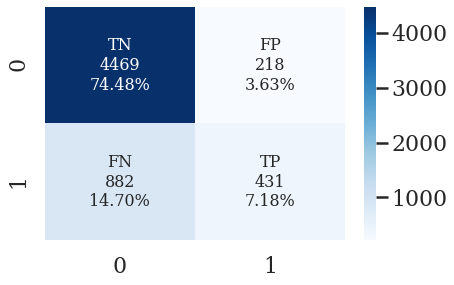

In [53]:
logb = LogisticRegression(C=1, penalty='l1', solver='saga').fit(X_tr, y_tr)
y_pred_logb_tr = logb.predict(X_tr)
y_pred_logb_val = logb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_logb_tr, y_pred_logb_val, logb)

In [52]:
# dtc = DecisionTreeClassifier()
# params = {'criterion': ['gini', 'entropy'],
#           'max_depth': [2, 4, 6, 8, 10],
#           'min_samples_leaf': [2, 4, 6, 8, 10], 
#           'min_samples_split': [2, 4, 6, 8, 10]}
# gsdtc = GridSearchCV(estimator = dtc,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 5,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gsdtc_tr = gsdtc.predict(X_tr)
# y_pred_gsdtc_val = gsdtc.predict(X_val)
# print("Best: %f using %s" % (gsdtc.best_score_, gsdtc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsdtc_tr, y_pred_gsdtc_val, gsdtc)

# # Best: 0.511668 using {'criterion': 'entropy', 'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 8}


Training Accuracy:  0.826047619047619
Validation Accuracy:  0.8173333333333334
Training F1 Score:  0.5002052264331646
Validation F1 Score:  0.46168958742632615
Training AUC Score:  0.781021964090777
Validation AUC Score:  0.7602510452092296
Training Recall Score:  0.39261168384879724
Validation Recall Score:  0.357958872810358
Training Precision Score:  0.6890312853373539
Validation Precision Score:  0.6500691562932227
Training Average Precision Score:  0.5600665276232221
Validation Average Precision Score:  0.5058735868130263

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     16344
           1       0.69      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0   

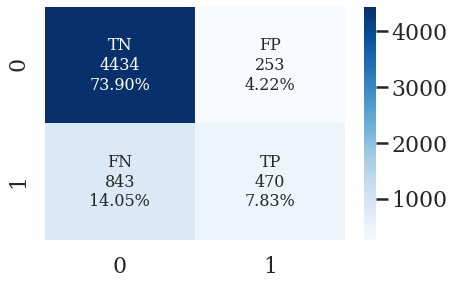

In [51]:
dtcb = DecisionTreeClassifier(criterion='entropy', max_depth=6, min_samples_leaf=10, min_samples_split=8).fit(X_tr, y_tr)
y_pred_dtcb_tr = dtcb.predict(X_tr)
y_pred_dtcb_val = dtcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_dtcb_tr, y_pred_dtcb_val, dtcb)

In [50]:
# rfc = RandomForestClassifier()
# params = {'n_estimators': [100, 200, 400, 600, 1000],
#           'criterion': ['entropy', 'gini'],
#           'max_depth': [5, 8, 15, 25, 30],
#           'min_samples_split': [2, 5, 10, 15, 100],
#           'min_samples_leaf': [1, 2, 5, 10]}
# gsrfc = GridSearchCV(estimator = rfc,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 5,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gsrfc_tr = gsrfc.predict(X_tr)
# y_pred_gsrfc_val = gsrfc.predict(X_val)
# print("Best: %f using %s" % (gsrfc.best_score_, gsrfc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsrfc_tr, y_pred_gsrfc_val, gsrfc)

# # Best: 0.558041 using {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 1000}

Training Accuracy:  0.8401904761904762
Validation Accuracy:  0.8208333333333333
Training F1 Score:  0.5298402913981507
Validation F1 Score:  0.46061214249874566
Training AUC Score:  0.8336297024833772
Validation AUC Score:  0.77861177494881
Training Recall Score:  0.4061426116838488
Validation Recall Score:  0.3495811119573496
Training Precision Score:  0.7618855761482676
Validation Precision Score:  0.675
Training Average Precision Score:  0.6609143205633637
Validation Average Precision Score:  0.5401255413653616

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.96      0.90     16344
           1       0.76      0.41      0.53      4656

    accuracy                           0.84     21000
   macro avg       0.81      0.68      0.72     21000
weighted avg       0.83      0.84      0.82     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84     

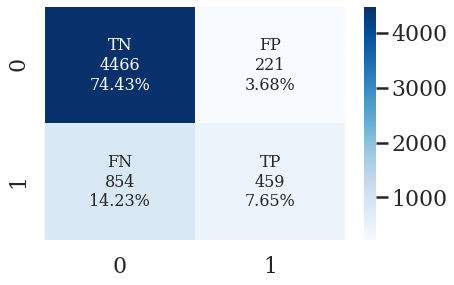

In [49]:
rfcb = RandomForestClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2, min_samples_split=5, n_estimators=1000).fit(X_tr, y_tr)
y_pred_rfcb_tr = rfcb.predict(X_tr)
y_pred_rfcb_val = rfcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_rfcb_tr, y_pred_rfcb_val, rfcb)

In [66]:
# abc = AdaBoostClassifier()
# params = {'n_estimators': [10, 50, 100, 200],
#           'learning_rate': [0.001, 0.01, 0.1, 0.2, 0.5]}
# gsabc = GridSearchCV(estimator = abc,
#                      param_grid = params,
#                      n_jobs = -1,
#                      cv = 5,
#                      scoring = 'average_precision').fit(X_tr, y_tr)
# y_pred_gsabc_tr = gsabc.predict(X_tr)
# y_pred_gsabc_val = gsabc.predict(X_val)
# print("Best: %f using %s" % (gsabc.best_score_, gsabc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsabc_tr, y_pred_gsabc_val, gsabc)

# Best: 0.542080 using {'learning_rate': 0.2, 'n_estimators': 200}

Training Accuracy:  0.8196666666666667
Validation Accuracy:  0.8186666666666667
Training F1 Score:  0.4593861527480371
Validation F1 Score:  0.442051282051282
Training AUC Score:  0.7889149790458745
Validation AUC Score:  0.7720152043432995
Training Recall Score:  0.34557560137457044
Validation Recall Score:  0.32825590251332826
Training Precision Score:  0.6849723286504895
Validation Precision Score:  0.6766091051805337
Training Average Precision Score:  0.5570414178758096
Validation Average Precision Score:  0.5189599679378362

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.84      0.95      0.89     16344
           1       0.68      0.35      0.46      4656

    accuracy                           0.82     21000
   macro avg       0.76      0.65      0.68     21000
weighted avg       0.80      0.82      0.80     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0 

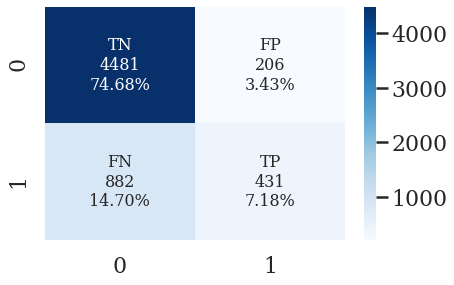

In [61]:
abcb = AdaBoostClassifier(learning_rate=0.2, n_estimators=200).fit(X_tr, y_tr)
y_pred_abcb_tr = abcb.predict(X_tr)
y_pred_abcb_val = abcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_abcb_tr, y_pred_abcb_val, abcb)

In [65]:
# gbc = GradientBoostingClassifier()
# params = {'n_estimators': [10, 100, 1000],
#           'learning_rate': [0.001, 0.01, 0.1],
#           'max_depth': [3, 7, 9]}
# gsgbc = GridSearchCV(estimator = gbc,
#                      param_grid = params, 
#                      n_jobs = -1, 
#                      cv = 5, 
#                      scoring = 'average_precision').fit(X_tr, y_tr)
# y_pred_gsgbc_tr = gsgbc.predict(X_tr)
# y_pred_gsgbc_val = gsgbc.predict(X_val)
# print("Best: %f using %s" % (gsgbc.best_score_, gsgbc.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsgbc_tr, y_pred_gsgbc_tr, gsgbc)

# # Best: 0.554906 using {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 1000}

Training Accuracy:  0.828047619047619
Validation Accuracy:  0.82
Training F1 Score:  0.500898410504492
Validation F1 Score:  0.46375372393247266
Training AUC Score:  0.8083487687611541
Validation AUC Score:  0.7790505930178122
Training Recall Score:  0.38917525773195877
Validation Recall Score:  0.3556740289413557
Training Precision Score:  0.7025979061651803
Validation Precision Score:  0.666191155492154
Training Average Precision Score:  0.6072201316850476
Validation Average Precision Score:  0.5396238144281216

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16344
           1       0.70      0.39      0.50      4656

    accuracy                           0.83     21000
   macro avg       0.77      0.67      0.70     21000
weighted avg       0.81      0.83      0.81     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84      

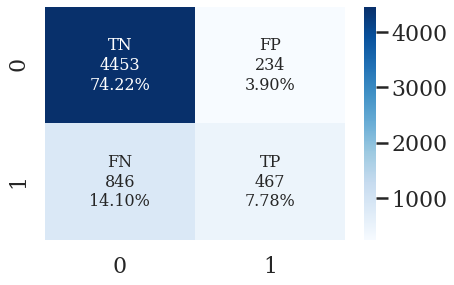

In [64]:
gbcb = GradientBoostingClassifier(learning_rate=0.01, max_depth=3, n_estimators=1000).fit(X_tr, y_tr)
y_pred_gbcb_tr = gbcb.predict(X_tr)
y_pred_gbcb_val = gbcb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gbcb_tr, y_pred_gbcb_val, gbcb)

In [46]:
# xgb = XGBClassifier()
# params = {'n_estimators': [50, 100, 150, 200], 
#           'max_depth': [3, 5, 7, 10], 
#           'min_child_weight': [2, 3, 4, 5]}
# gsxgb = GridSearchCV(estimator = xgb,
#                      param_grid = params,
#                      scoring = 'average_precision',
#                      cv = 5,
#                      n_jobs = -1).fit(X_tr, y_tr)
# y_pred_gsxgb_tr = gsxgb.predict(X_tr)
# y_pred_gsxgb_val = gsxgb.predict(X_val)
# print("Best: %f using %s" % (gsxgb.best_score_, gsxgb.best_params_))
# print("")
# get_metrics(X_tr, y_tr, X_val, y_val, y_pred_gsxgb_tr, y_pred_gsxgb_val, gsxgb)

# Best: 0.550954 using {'max_depth': 3, 'min_child_weight': 3, 'n_estimators': 50}

[10:32:31] WARNING: /Users/runner/miniforge3/conda-bld/xgboost_1607604592557/work/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Training Accuracy:  0.8284285714285714
Validation Accuracy:  0.8183333333333334
Training F1 Score:  0.5039239983477901
Validation F1 Score:  0.45878848063555117
Training AUC Score:  0.8163144534896629
Validation AUC Score:  0.7758664199124118
Training Recall Score:  0.39304123711340205
Validation Recall Score:  0.3518659558263519
Training Precision Score:  0.7019562715765247
Validation Precision Score:  0.6590584878744651
Training Average Precision Score:  0.6116102705441417
Validation Average Precision Score:  0.5359007091828918

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     16344
          

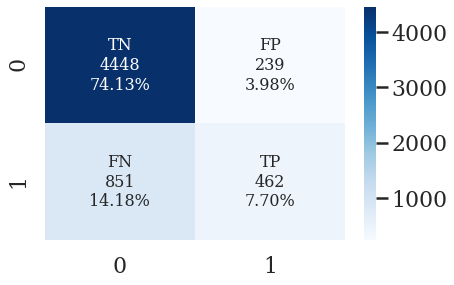

In [45]:
xgbb = XGBClassifier(max_depth=3, min_child_weight=3, n_estimators=50).fit(X_tr, y_tr)
y_pred_xgbb_tr = xgbb.predict(X_tr)
y_pred_xgbb_val = xgbb.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_xgbb_tr, y_pred_xgbb_val, xgbb)

In [67]:
data = {'Accuracy': [accuracy(y_val, y_pred_logb_val), 
                     accuracy(y_val, y_pred_dtcb_val), 
                     accuracy(y_val, y_pred_rfcb_val), 
                     accuracy(y_val, y_pred_abcb_val), 
                     accuracy(y_val, y_pred_gbcb_val),
                     accuracy(y_val, y_pred_xgbb_val)],
        'F1 Score': [f1(y_val, y_pred_logb_val), 
                     f1(y_val, y_pred_dtcb_val), 
                     f1(y_val, y_pred_rfcb_val), 
                     f1(y_val, y_pred_abcb_val), 
                     f1(y_val, y_pred_gbcb_val),
                     f1(y_val, y_pred_xgbb_val)],
        'ROC AUC': [auc(X_val, y_val, logb),
                    auc(X_val, y_val, dtcb),
                    auc(X_val, y_val, rfcb),
                    auc(X_val, y_val, abcb),
                    auc(X_val, y_val, gbcb),
                    auc(X_val, y_val, xgbb)],
        'Recall': [recall(y_val, y_pred_logb_val), 
                   recall(y_val, y_pred_dtcb_val), 
                   recall(y_val, y_pred_rfcb_val), 
                   recall(y_val, y_pred_abcb_val),
                   recall(y_val, y_pred_gbcb_val),
                   recall(y_val, y_pred_xgbb_val)],
        'Precision': [precision(y_val, y_pred_logb_val), 
                      precision(y_val, y_pred_dtcb_val), 
                      precision(y_val, y_pred_rfcb_val), 
                      precision(y_val, y_pred_abcb_val),
                      precision(y_val, y_pred_gbcb_val),
                      precision(y_val, y_pred_xgbb_val)],
        'PR AUC': [aps(X_val, y_val, logb),
                   aps(X_val, y_val, dtcb),
                   aps(X_val, y_val, rfcb),
                   aps(X_val, y_val, abcb),
                   aps(X_val, y_val, gbcb),
                   aps(X_val, y_val, xgbb)]}
scores3 = pd.DataFrame(data=data, index = ['Logistic with GridSearchCV', 
                                          'Random Forest with GridSearchCV', 
                                          'Decision Tree with GridSearchCV', 
                                          'AdaBoost with GridSearchCV', 
                                          'Gradient Boosting with GridSearchCV',
                                          'XGBoost with GridSearchCV'])

In [68]:
scores3

,Accuracy,F1 Score,ROC AUC,Recall,Precision,PR AUC
Logistic with GridSearchCV,0.816667,0.439348,0.750020,0.328256,0.664099,0.500342
Random Forest with GridSearchCV,0.817333,0.461690,0.760251,0.357959,0.650069,0.505874
Decision Tree with GridSearchCV,0.820833,0.460612,0.778612,0.349581,0.675000,0.540126
AdaBoost with GridSearchCV,0.818667,0.442051,0.772015,0.328256,0.676609,0.518960
Gradient Boosting with GridSearchCV,0.820000,0.463754,0.779051,0.355674,0.666191,0.539624
XGBoost with GridSearchCV,0.818333,0.458788,0.775866,0.351866,0.659058,0.535901


# <a id='5'>Class Imbalance</a>

## Ensemble Methods

Training Accuracy:  0.9974761904761905
Validation Accuracy:  0.81
Training F1 Score:  0.9942955548380152
Validation F1 Score:  0.4482090997095838
Training AUC Score:  0.9999111339344137
Validation AUC Score:  0.7452822385847584
Training Recall Score:  0.992053264604811
Validation Recall Score:  0.3526275704493526
Training Precision Score:  0.9965480043149946
Validation Precision Score:  0.6148738379814077
Training Average Precision Score:  0.9996751346468532
Validation Average Precision Score:  0.49056527751999246

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16344
           1       1.00      0.99      0.99      4656

    accuracy                           1.00     21000
   macro avg       1.00      1.00      1.00     21000
weighted avg       1.00      1.00      1.00     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.84     

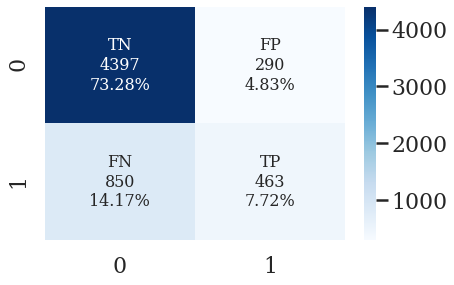

In [9]:
bc = BaggingClassifier(n_estimators=50, random_state=42).fit(X_tr, y_tr)
y_pred_bc_tr = bc.predict(X_tr)
y_pred_bc_val = bc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_bc_tr, y_pred_bc_val, bc)
print("")
print('Bagging Classifier Performance:')
print('Balanced training accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_tr, y_pred_bc_tr), geometric_mean_score(y_tr, y_pred_bc_tr)))
print('Balanced validation accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bc_val), geometric_mean_score(y_val, y_pred_bc_val)))

Training Accuracy:  0.9440952380952381
Validation Accuracy:  0.7768333333333334
Training F1 Score:  0.8879557167398359
Validation F1 Score:  0.5143271672107363
Training AUC Score:  0.9958726919659453
Validation AUC Score:  0.7622059427389951
Training Recall Score:  0.9991408934707904
Validation Recall Score:  0.53998476770754
Training Precision Score:  0.7990381312263827
Validation Precision Score:  0.4909972299168975
Training Average Precision Score:  0.9829127641866706
Validation Average Precision Score:  0.5125807863159251

Training Classification Report: 
              precision    recall  f1-score   support

           0       1.00      0.93      0.96     16344
           1       0.80      1.00      0.89      4656

    accuracy                           0.94     21000
   macro avg       0.90      0.96      0.93     21000
weighted avg       0.96      0.94      0.95     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0    

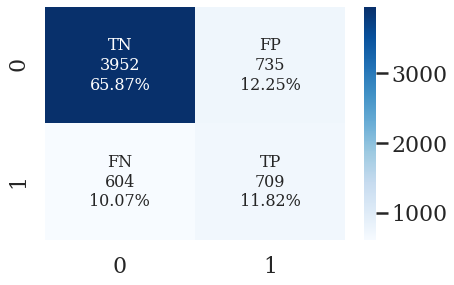

In [10]:
bbc = BalancedBaggingClassifier(n_estimators=50, random_state=42).fit(X_tr, y_tr)
y_pred_bbc_tr = bbc.predict(X_tr)
y_pred_bbc_val = bbc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_bbc_tr, y_pred_bbc_val, bbc)
print("")
print('Balanced Bagging Classifier Performance:')
print('Balanced training accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_tr, y_pred_bbc_tr), geometric_mean_score(y_val, y_pred_bbc_tr)))
print('Balanced validation accuracy: {:.2f} - Geometric mean {:.2f}'.format(balanced_accuracy_score(y_val, y_pred_bbc_val), geometric_mean_score(y_val, y_pred_bbc_val)))

## Undersampling Methods:  Remove Majority Class

In [15]:
# separate minority and majority classes
majority = train[train.default==0]
minority = train[train.default==1]

#baseline counts
counter = Counter(y_tr)
print("Baseline: ", counter)

Baseline:  Counter({0: 16344, 1: 4656})


In [18]:
downsampled = resample(majority, replace = False, n_samples = len(minority), random_state=42)
dns = pd.concat([downsampled, minority])
print(dns.default.value_counts())

1    4656
0    4656
Name: default, dtype: int64

In [22]:
ns = NearMiss(version=1, n_neighbors=3)
X_tr_nm, y_tr_nm = ns.fit_resample(X_tr, y_tr)
counter_nm = Counter(y_tr_nm)
print("Near Miss: ", counter_nm)

Near Miss:  Counter({0: 4656, 1: 4656})


In [23]:
ncr = NeighbourhoodCleaningRule(n_neighbors=3, threshold_cleaning=0.5)
X_tr_ncr, y_tr_ncr = ncr.fit_resample(X_tr, y_tr)
counter_ncr = Counter(y_tr_ncr)
print("Neighborhood Cleaning Rule: ", counter_ncr)


Neighborhood Cleaning Rule:  Counter({0: 10212, 1: 4656})


In [24]:
oss = OneSidedSelection(n_neighbors=1, n_seeds_S=200)
X_tr_oss, y_tr_oss = oss.fit_resample(X_tr, y_tr)
counter_oss = Counter(y_tr_oss)
print("One Sided Selection: ", counter_oss)

One Sided Selection:  Counter({0: 13737, 1: 4656})


In [25]:
tl = TomekLinks()
X_tr_tk, y_tr_tk = tl.fit_resample(X_tr, y_tr)
counter_tomek = Counter(y_tr_tomek)
print("Tomek Links: ", counter_tomek)

Tomek Links:  Counter({0: 15130, 1: 4656})


In [ ]:
results['tomek'] = (accuracy_score(y_test, tomek_pred), f1_score(y_test, tomek_pred))

## SMOTE

In [17]:
# Upsampling
upsampled = resample(minority, replace=True, n_samples=len(majority), random_state=42) 
ups = pd.concat([majority, upsampled])
print(ups.default.value_counts())

1    16344
0    16344
Name: default, dtype: int64


Training Accuracy:  0.7782857142857142
Validation Accuracy:  0.7811666666666667
Training F1 Score:  0.0
Validation F1 Score:  0.0
Training AUC Score:  0.5
Validation AUC Score:  0.5
Training Recall Score:  0.0
Validation Recall Score:  0.0
Training Precision Score:  0.0
Validation Precision Score:  0.0
Training Average Precision Score:  0.22171428571428572
Validation Average Precision Score:  0.21883333333333332

Training Classification Report: 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88     16344
           1       0.00      0.00      0.00      4656

    accuracy                           0.78     21000
   macro avg       0.39      0.50      0.44     21000
weighted avg       0.61      0.78      0.68     21000


Validation Classification Report: 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88      4687
           1       0.00      0.00      0.00      1313

    accuracy           

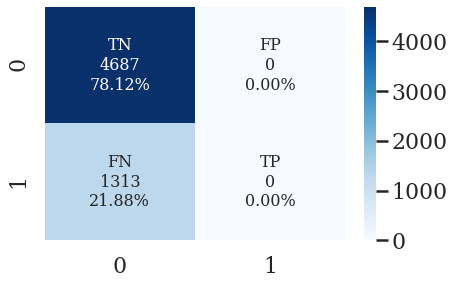

In [87]:
dc = DummyClassifier(strategy='most_frequent').fit(X_tr, y_tr)
y_pred_dc_tr = dc.predict(X_tr)
y_pred_dc_val = dc.predict(X_val)
get_metrics(X_tr, y_tr, X_val, y_val, y_pred_dc_tr, y_pred_dc_val, dc)

In [14]:
sm = SMOTE(sampling_strategy='minority', random_state=42)
X_tr_smote, y_tr_smote = sm.fit_sample(X_tr, y_tr)
counter(y_tr_smote)

NameError: name 'counter' is not defined

## Upsampling and Downsampling

In [ ]:
# define model
dtc = DecisionTreeClassifier()
# define pipeline
over = SMOTE(sampling_strategy=0.1)
under = RandomUnderSampler(sampling_strategy=0.5)
steps = [('o', over), ('u', under), ('m', dtc)]

# Hyperparamater Tuning

## Logistic Regression with GridSearchCV

## Decision Tree Classifier with GridSearchCCV

## Random Forest Classifier with GridSearchCV

## AdaBoost Classifier with GridSearchCV

## Gradient Boosting Classifier with GridSearchCV

## XGBoost Classifier with GridSearchCV

In [73]:
scores = pd.read_csv("../data/scores.csv")
scores2 = pd.read_csv("../data/scores2.csv")

In [77]:
scores2 = scores2.drop(scores2.index[[3, 4, 5]])
scores2

,Unnamed: 0,Accuracy,F1 Score,ROC AUC,Recall,Precision,PR AUC
0,Logistic Regression,0.816333,0.432544,0.755982,0.319878,0.667727,0.509078
1,Random Forest Classifier,0.815500,0.461314,0.755349,0.361005,0.638814,0.512912
2,Decision Tree Classifier,0.720833,0.386222,0.605721,0.401371,0.372175,0.280380
6,AdaBoost Classifier,0.816667,0.431231,0.774386,0.317593,0.671498,0.524642
7,Gradient Boosting Classifier,0.819500,0.461462,0.783553,0.353389,0.664756,0.545295
8,XGBoost Classifier,0.812667,0.459095,0.765425,0.363290,0.623529,0.521037
